<a href="https://colab.research.google.com/github/Jodagito/MonkeyCNN/blob/master/Monkey_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Requirements installation**

In [0]:
!pip install keras numpy matplotlib sklearn pandas tensorflow kaggle

## **Loading kaggle.json (kaggle's API token)**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dagito","key":"fcfe7ea0d7773b2fbdc9c0582bc09470"}'}

## **Creating .keras directory**

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!cd ~/.kaggle

## **Downloding and unzipping dataset**

In [3]:
!kaggle datasets download -d slothkong/10-monkey-species
!unzip 10-monkey-species.zip
!unzip training.zip
!unzip validation.zip

 98% 537M/547M [00:13<00:00, 49.9MB/s]
100% 547M/547M [00:13<00:00, 42.4MB/s]
Archive:  10-monkey-species.zip
  inflating: training.zip            
  inflating: validation.zip          
  inflating: monkey_labels.txt       
Archive:  training.zip
   creating: training/n0/
  inflating: training/n0/n0018.jpg   
  inflating: training/n0/n0019.jpg   
  inflating: training/n0/n0020.jpg   
  inflating: training/n0/n0021.jpg   
  inflating: training/n0/n0022.jpg   
  inflating: training/n0/n0023.jpg   
  inflating: training/n0/n0024.jpg   
  inflating: training/n0/n0025.jpg   
  inflating: training/n0/n0026.jpg   
  inflating: training/n0/n0027.jpg   
  inflating: training/n0/n0028.jpg   
  inflating: training/n0/n0029.jpg   
  inflating: training/n0/n0030.jpg   
  inflating: training/n0/n0031.jpg   
  inflating: training/n0/n0032.jpg   
  inflating: training/n0/n0033.jpg   
  inflating: training/n0/n0034.jpg   
  inflating: training/n0/n0035.jpg   
  inflating: training/n0/n0036.jpg   
  inf

## **Importations**

In [4]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from keras import applications, layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## **Preprocessing data**

In [52]:
img_width, img_height = 224, 224  # default dimensions for ResNet50
train_dir = '/content/training/'
test_dir = '/content/validation/'
batch_size = 8
train_datagen = ImageDataGenerator(rotation_range=30, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True,
                                   rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height,
                                                                 img_width),
                                                    batch_size=batch_size)
test_generator = test_datagen.flow_from_directory(test_dir, shuffle=False,
                                                  target_size=(img_height,
                                                               img_width),
                                                  batch_size=batch_size)

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


## **Layers creation and Model compilation**

In [6]:
application_base = applications.Xception(include_top=False)
x = application_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(int(len(train_generator.class_indices.keys())),
                       activation='softmax')(x)
model = models.Model(inputs=application_base.input,
                                 outputs=outputs)
model.compile(loss='categorical_crossentropy',
                          optimizer=optimizers.Adam(lr=0.00001),
                          metrics=['accuracy'])

83689472/83683744 [==============================] - 7s 0us/step


## **Training**

In [7]:
fitting = model.fit_generator(train_generator, epochs=10,
                                          validation_data=test_generator,
                                          validation_steps=34,
                                          steps_per_epoch=137
                                          )

Epoch 1/10
137/137 [==============================] - 86s 624ms/step - loss: 2.1450 - acc: 0.2746 - val_loss: 1.7828 - val_acc: 0.6728
Epoch 2/10
137/137 [==============================] - 71s 520ms/step - loss: 1.5631 - acc: 0.7564 - val_loss: 0.8989 - val_acc: 0.9301
Epoch 3/10
137/137 [==============================] - 70s 513ms/step - loss: 0.8956 - acc: 0.8842 - val_loss: 0.3918 - val_acc: 0.9596
Epoch 4/10
137/137 [==============================] - 70s 514ms/step - loss: 0.5484 - acc: 0.9070 - val_loss: 0.2331 - val_acc: 0.9706
Epoch 5/10
137/137 [==============================] - 70s 511ms/step - loss: 0.3679 - acc: 0.9416 - val_loss: 0.1588 - val_acc: 0.9779
Epoch 6/10
137/137 [==============================] - 70s 513ms/step - loss: 0.2893 - acc: 0.9462 - val_loss: 0.1245 - val_acc: 0.9816
Epoch 7/10
137/137 [==============================] - 70s 514ms/step - loss: 0.2180 - acc: 0.9517 - val_loss: 0.0960 - val_acc: 0.9816
Epoch 8/10
137/137 [==============================] - 7

## **Predictions**

In [53]:
predictions = model.predict_generator(test_generator, steps=34, verbose=1)
predictions

34/34 [==============================] - 10s 281ms/step


array([[9.8310375e-01, 1.0065953e-03, 4.6006758e-03, ..., 1.1974918e-03,
        2.5724643e-03, 2.9044005e-03],
       [9.9329281e-01, 7.1847229e-05, 4.7877734e-04, ..., 1.9868495e-04,
        5.3262460e-04, 3.4441424e-03],
       [9.9762303e-01, 7.4947588e-05, 3.8123754e-04, ..., 2.1719174e-04,
        1.5774506e-04, 5.2743632e-04],
       ...,
       [1.7815964e-02, 1.3449849e-04, 2.6949731e-04, ..., 2.1977465e-04,
        3.0702361e-04, 9.7723573e-01],
       [5.9266388e-04, 1.4354398e-04, 2.1387625e-04, ..., 3.3676170e-04,
        2.5201740e-04, 9.9646842e-01],
       [6.7262058e-03, 2.3545418e-04, 1.7446383e-04, ..., 3.5740528e-04,
        1.4751528e-04, 9.8863834e-01]], dtype=float32)

## **Confusion Matrix**

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(azis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', 
             color='white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

Confusion matrix, without normalization
[[26  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  1]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  1]
 [ 0  0  1  0 25  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 25  1  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 26]]


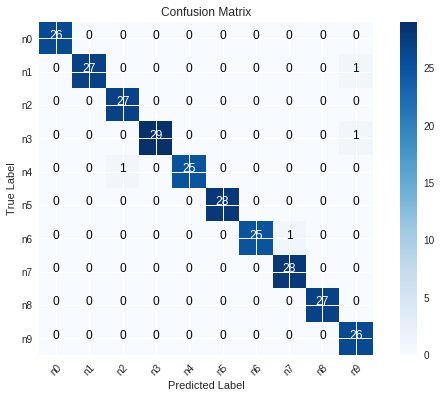

In [54]:
test_labels = test_generator.classes
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
cm_plot_labels = ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']
plot_confusion_matrix(cm, cm_plot_labels)

## **Ploting**

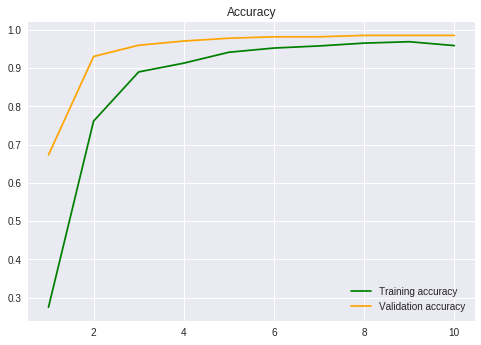

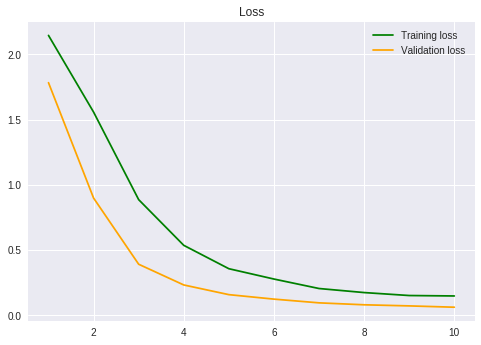

In [55]:
acc = fitting.history['acc']
val_acc = fitting.history['val_acc']
loss = fitting.history['loss']
val_loss = fitting.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.title('Accuracy')
plt.plot(epochs, acc, 'green', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.legend()
plt.figure()
plt.title('Loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.legend()
plt.show()